- Building Square Footage – Total building area as reported in PM
- Building Age – Age of building based on year built from PLUTO database (new variable)
- Number of Floors – Total number of floors in building from PLUTO database
- FAR – As-built floor area ratio from PLUTO database
- Lot Coverage – building footprint divided by lot area from PLUTO database. Building footprint approximated by multiplying building width by building depth (new variable)
- Lot Location – a binary variable for whether the building is an inside lot or corner lot (based on variable from the PLUTO database)
- Detached Building - a binary variable for whether the building is detached or attached to adjacent buildings (based on variable from the PLUTO database)
- Primary Energy Source – a binary variable equal to 1 for the dominant fuel type in the building, and equal to 0 otherwise (new variable)
- % non-Primary Space Type – percentage of non-primary space type (e.g. percentage of retail in a building with a majority office space) (new variable)

For Office buildings, the following variables are added to the base model:
- Office Worker Density – Number of employees per 1,000 square feet (default value = 2.3)
- Office Weekly Operating Hours – number of hours per week that a building is occupied by at least 75% of the tenant employees (default value = 65 hours per week)
- Floor Plate Size – estimate of average floor plate size (new variable)

For Multi-Family buildings, the following variables are added to the base model: Affordable or Market Rate – a binary variable equal to 1 if all units in building are affordable, and equal to 0 if market-rate (new variable); note that “affordable” is used here according to the EPA Portfolio 
- Manager definition, which includes subsidized housing intended for low-income households.
- Number of Laundry Facilities per Unit – total number of laundry facilities for each residential unit
- Number of Dishwashers per Unit – total number of dishwashers for each residential unit Percent Cooled – percent of gross floor space that is air conditioned
- Average Unit Size = estimate of the average gross floor area per unit (new variable)

In [329]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [330]:
# load data
ll84_all_2021 = pd.read_csv('/Users/luchen/Documents/MSUA/Capstone/datasets/ll84/yearly/Energy_and_Water_Data_Disclosure_for_Local_Law_84_2022__Data_for_Calendar_Year_2021_.csv', na_values='')
ll84_all_2020 = pd.read_csv('/Users/luchen/Documents/MSUA/Capstone/datasets/ll84/yearly/Energy_and_Water_Data_Disclosure_for_Local_Law_84_2021__Data_for_Calendar_Year_2020_.csv', na_values='')
ll84_all_2019 = pd.read_csv('/Users/luchen/Documents/MSUA/Capstone/datasets/ll84/yearly/Energy_and_Water_Data_Disclosure_for_Local_Law_84_2020__Data_for_Calendar_Year_2019_.csv', na_values='')
ll84_all_2018 = pd.read_csv('/Users/luchen/Documents/MSUA/Capstone/datasets/ll84/yearly/Energy_and_Water_Data_Disclosure_for_Local_Law_84_2019__Data_for_Calendar_Year_2018_.csv', na_values='')
ll84_all_2017 = pd.read_csv('/Users/luchen/Documents/MSUA/Capstone/datasets/ll84/yearly/Energy_and_Water_Data_Disclosure_for_Local_Law_84_2018__Data_for_Calendar_Year_2017_.csv', na_values='')
ll84_all_2016 = pd.read_csv('/Users/luchen/Documents/MSUA/Capstone/datasets/ll84/yearly/Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017__Data_for_Calendar_Year_2016_.csv', na_values='')
ll84_all_2015 = pd.read_csv('/Users/luchen/Documents/MSUA/Capstone/datasets/ll84/yearly/Energy_and_Water_Data_Disclosure_for_Local_Law_84_2016__Data_for_Calendar_Year_2015_.csv', na_values='')
ll84_all_2014 = pd.read_csv('/Users/luchen/Documents/MSUA/Capstone/datasets/ll84/yearly/Energy_and_Water_Data_Disclosure_for_Local_Law_84_2015__Data_for_Calendar_Year_2014_.csv', na_values='')
# ll84_all_2013 = pd.read_csv('/Users/luchen/Documents/MSUA/Capstone/datasets/ll84/yearly/Energy_and_Water_Data_Disclosure_for_Local_Law_84_2014__Data_for_Calendar_Year_2013_.csv', na_values='')
# ll84_all_2012 = pd.read_csv('/Users/luchen/Documents/MSUA/Capstone/datasets/ll84/yearly/Energy_and_Water_Data_Disclosure_for_Local_Law_84_2013__Data_for_Calendar_Year_2012_.csv', na_values='')
# ll84_all_2011 = pd.read_csv('/Users/luchen/Documents/MSUA/Capstone/datasets/ll84/yearly/Energy_and_Water_Data_Disclosure_for_Local_Law_84_2012__Data_for_Calendar_Year_2011_.csv', na_values='')

ll84_all_2021 = ll84_all_2021.replace('Not Available', None)
ll84_all_2020 = ll84_all_2020.replace('Not Available', None)
ll84_all_2019 = ll84_all_2019.replace('Not Available', None)
ll84_all_2018 = ll84_all_2018.replace('Not Available', None)
ll84_all_2017 = ll84_all_2017.replace('Not Available', None)
ll84_all_2016 = ll84_all_2016.replace('Not Available', None)
ll84_all_2015 = ll84_all_2015.replace('Not Available', None)
ll84_all_2014 = ll84_all_2014.replace('Not Available', None)
# ll84_all_2013 = ll84_all_2012.replace('Not Available', None)
# ll84_all_2012 = ll84_all_2011.replace('Not Available', None)

# print(ll84_all_2021.shape)
# print(ll84_all_2021.head())

/var/folders/x5/bpzm5rm93fz73p0v851qytl80000gn/T/ipykernel_82951/3110754522.py:2: DtypeWarning: Columns (9,15,216,217) have mixed types. Specify dtype option on import or set low_memory=False.
  ll84_all_2021 = pd.read_csv('/Users/luchen/Documents/MSUA/Capstone/datasets/ll84/yearly/Energy_and_Water_Data_Disclosure_for_Local_Law_84_2022__Data_for_Calendar_Year_2021_.csv', na_values='')
/var/folders/x5/bpzm5rm93fz73p0v851qytl80000gn/T/ipykernel_82951/3110754522.py:3: DtypeWarning: Columns (9,15,218,219) have mixed types. Specify dtype option on import or set low_memory=False.
  ll84_all_2020 = pd.read_csv('/Users/luchen/Documents/MSUA/Capstone/datasets/ll84/yearly/Energy_and_Water_Data_Disclosure_for_Local_Law_84_2021__Data_for_Calendar_Year_2020_.csv', na_values='')
/var/folders/x5/bpzm5rm93fz73p0v851qytl80000gn/T/ipykernel_82951/3110754522.py:4: DtypeWarning: Columns (10,16,82,225,226) have mixed types. Specify dtype option on import or set low_memory=False.
  ll84_all_2019 = pd.read_c

In [331]:
# general description

# office buildings and multi-family buildings count in each year

# office buildings and multi-family buildings count in each year in each borough

# histogram of eui of office and multi-family buildings in each year

# average eui in each borough?

In [332]:
# merge data of each year

In [333]:
# the difference for buildings

# change of working hours?

# what kind of building have higher difference in working hours?

# what kind of building wfh impact larger on eui

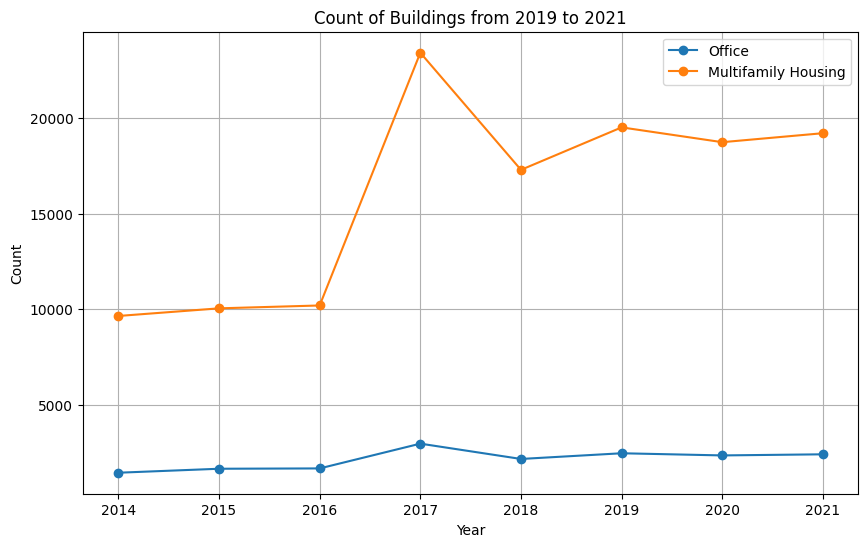

In [334]:
# office buildings
office_2021 = ll84_all_2021[(ll84_all_2021['Primary Property Type - Self Selected'] == 'Office')]
office_2020 = ll84_all_2020[(ll84_all_2020['Primary Property Type - Self Selected'] == 'Office')]
office_2019 = ll84_all_2019[(ll84_all_2019['Primary Property Type - Self Selected'] == 'Office')]
office_2018 = ll84_all_2018[(ll84_all_2018['Primary Property Type - Self Selected'] == 'Office')]
office_2017 = ll84_all_2017[(ll84_all_2017['Primary Property Type - Self Selected'] == 'Office')]
office_2016 = ll84_all_2016[(ll84_all_2016['Primary Property Type - Self Selected'] == 'Office')]
office_2015 = ll84_all_2015[(ll84_all_2015['Primary Property Type - Self Selected'] == 'Office')]
office_2014 = ll84_all_2014[(ll84_all_2014['Primary Property Type - Self Selected'] == 'Office')]
#office_2013 = ll84_all_2013[(ll84_all_2013['Primary Property Type - Self Selected'] == 'Office')]
#office_2012 = ll84_all_2012[(ll84_all_2012['Primary Property Type - Self Selected'] == 'Office')]
#office_2011 = ll84_all_2011[(ll84_all_2011['Primary Property Type - Self Selected'] == 'Office')]

# multi-family buildings
mtfam_2021 = ll84_all_2021[(ll84_all_2021['Primary Property Type - Self Selected'] == 'Multifamily Housing')]
mtfam_2020 = ll84_all_2020[(ll84_all_2020['Primary Property Type - Self Selected'] == 'Multifamily Housing')]
mtfam_2019 = ll84_all_2019[(ll84_all_2019['Primary Property Type - Self Selected'] == 'Multifamily Housing')]
mtfam_2018 = ll84_all_2018[(ll84_all_2018['Primary Property Type - Self Selected'] == 'Multifamily Housing')]
mtfam_2017 = ll84_all_2017[(ll84_all_2017['Primary Property Type - Self Selected'] == 'Multifamily Housing')]
mtfam_2016 = ll84_all_2016[(ll84_all_2016['Primary Property Type - Self Selected'] == 'Multifamily Housing')]
mtfam_2015 = ll84_all_2015[(ll84_all_2015['Primary Property Type - Self Selected'] == 'Multifamily Housing')]
mtfam_2014 = ll84_all_2014[(ll84_all_2014['Primary Property Type - Self Selected'] == 'Multifamily Housing')]
# mtfam_2013 = ll84_all_2013[(ll84_all_2013['Primary Property Type - Self Selected'] == 'Multifamily Housing')]
#mtfam_2012 = ll84_all_2012[(ll84_all_2012['Primary Property Type - Self Selected'] == 'Multifamily Housing')]
#mtfam_2011 = ll84_all_2011[(ll84_all_2011['Primary Property Type - Self Selected'] == 'Multifamily Housing')]

# Count of buildings
count_dict = {
    'Year': [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
    'Office': [len(office_2014), len(office_2015), len(office_2016), len(office_2017), len(office_2018), len(office_2019), len(office_2020), len(office_2021)],
    'Multifamily': [len(mtfam_2014), len(mtfam_2015), len(mtfam_2016), len(mtfam_2017), len(mtfam_2018), len(mtfam_2019), len(mtfam_2020), len(mtfam_2021)]
}

# Convert dictionary into DataFrame
df_count = pd.DataFrame(count_dict)

# Plot line chart
plt.figure(figsize=(10, 6))
plt.plot(df_count['Year'], df_count['Office'], marker='o', label='Office')
plt.plot(df_count['Year'], df_count['Multifamily'], marker='o', label='Multifamily Housing')
plt.title('Count of Buildings from 2019 to 2021')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()


In [335]:
# normalize data
# Define the list of dataframes
df_list = [office_2014, office_2015, office_2016, office_2017, office_2018, office_2019, office_2020, office_2021]

for i in range(len(df_list)):
    # Convert 'EUI' column to numeric
    df_list[i]['Weather Normalized Site EUI (kBtu/ft²)'] = pd.to_numeric(df_list[i]['Weather Normalized Site EUI (kBtu/ft²)'], errors='coerce')

    # Calculate IQR
    Q1 = df_list[i]['Weather Normalized Site EUI (kBtu/ft²)'].quantile(0)
    Q3 = df_list[i]['Weather Normalized Site EUI (kBtu/ft²)'].quantile(0.95)
    IQR = Q3 - Q1

    # Define criteria for an observation to be an outlier
    outlier_criteria = ((df_list[i]['Weather Normalized Site EUI (kBtu/ft²)'] < (Q1 - 1.5 * IQR)) | (df_list[i]['Weather Normalized Site EUI (kBtu/ft²)'] > (Q3 + 1.5 * IQR)))

    # Remove outliers
    df_list[i] = df_list[i][~outlier_criteria]

# Update the original dataframes
office_2014, office_2015, office_2016, office_2017, office_2018, office_2019, office_2020, office_2021 = df_list

/var/folders/x5/bpzm5rm93fz73p0v851qytl80000gn/T/ipykernel_82951/1739470594.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_list[i]['Weather Normalized Site EUI (kBtu/ft²)'] = pd.to_numeric(df_list[i]['Weather Normalized Site EUI (kBtu/ft²)'], errors='coerce')
/var/folders/x5/bpzm5rm93fz73p0v851qytl80000gn/T/ipykernel_82951/1739470594.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_list[i]['Weather Normalized Site EUI (kBtu/ft²)'] = pd.to_numeric(df_list[i]['Weather Normalized Site EUI (kBtu/f

In [353]:
# merge offices
# office_2013['Year'] = 2013
# office_2014['Year'] = 2014
# office_2015['Year'] = 2015
# office_2016['Year'] = 2016
# office_2017['Year'] = 2017
office_2018['Year'] = 2018
office_2019['Year'] = 2019
office_2020['Year'] = 2020
office_2021['Year'] = 2021

offices = pd.concat([office_2018, office_2019, office_2020, office_2021])

# print (offices.head())
# print (offices.shape)

/var/folders/x5/bpzm5rm93fz73p0v851qytl80000gn/T/ipykernel_82951/2623884863.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  offices_cleaned['Weather Normalized Site EUI (kBtu/ft²)'] = pd.to_numeric(offices_cleaned['Weather Normalized Site EUI (kBtu/ft²)'])


<Figure size 1000x600 with 0 Axes>

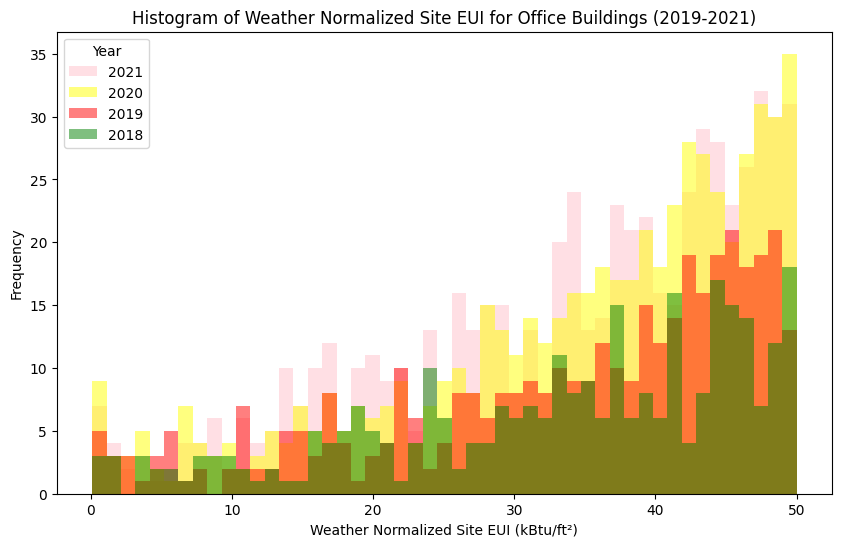

In [354]:
# # Drop rows with NaN values in 'Weather Normalized Site EUI (kBtu/ft²)' column
offices_cleaned = offices.dropna(subset=['Weather Normalized Site EUI (kBtu/ft²)'])
# offices_cleaned = offices_cleaned.drop(offices_cleaned['Weather Normalized Site EUI (kBtu/ft²)'])
offices_cleaned['Weather Normalized Site EUI (kBtu/ft²)'] = pd.to_numeric(offices_cleaned['Weather Normalized Site EUI (kBtu/ft²)'])
offices_cleaned = offices_cleaned[offices_cleaned['Weather Normalized Site EUI (kBtu/ft²)'] > 0]

# #offices_cleaned = offices.fillna({'Weather Normalized Site EUI (kBtu/ft²)': '0'})
plt.figure(figsize=(10, 6))

# Define bins for the histogram
bins = np.linspace(min(offices_cleaned['Weather Normalized Site EUI (kBtu/ft²)'].min(), 
                   offices_cleaned['Weather Normalized Site EUI (kBtu/ft²)'].max()), 50)

plt.figure(figsize=(10, 6))

for year, color in zip([2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014], ['pink', 'yellow', 'red', 'green', 'blue', 'grey', 'purple', 'orange']):
    subset = offices_cleaned[offices_cleaned['Year'] == year]
    plt.hist(subset['Weather Normalized Site EUI (kBtu/ft²)'], bins=bins, 
             alpha=0.5, color=color, label=str(year))
    
plt.title('Histogram of Weather Normalized Site EUI for Office Buildings (2019-2021)')
plt.xlabel('Weather Normalized Site EUI (kBtu/ft²)')
plt.ylabel('Frequency')
plt.legend(title='Year')
plt.show()

In [355]:
# Calculate average 'Weather Normalized Site EUI (kBtu/ft²)' for each year
offices_cleaned = offices.dropna(subset=['Weather Normalized Site EUI (kBtu/ft²)'])
# offices_cleaned = offices.fillna({'Site EUI (kBtu/ft²)': '0'})
offices_cleaned['Weather Normalized Site EUI (kBtu/ft²)'] = pd.to_numeric(offices_cleaned['Weather Normalized Site EUI (kBtu/ft²)'])
average_EUI = offices_cleaned.groupby('Year')['Weather Normalized Site EUI (kBtu/ft²)'].mean()

print(average_EUI)

Year
2018    85.856463
2019    81.030731
2020    70.559877
2021    68.815036
Name: Weather Normalized Site EUI (kBtu/ft²), dtype: float64


/var/folders/x5/bpzm5rm93fz73p0v851qytl80000gn/T/ipykernel_82951/3404158889.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  offices_cleaned['Weather Normalized Site EUI (kBtu/ft²)'] = pd.to_numeric(offices_cleaned['Weather Normalized Site EUI (kBtu/ft²)'])


/var/folders/x5/bpzm5rm93fz73p0v851qytl80000gn/T/ipykernel_82951/2409929945.py:18: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  df_long = df_concat.melt(id_vars=['Property Id', 'Year'], value_vars=['Weather Normalized Site EUI (kBtu/ft²)'], var_name='Variable', value_name='Weather Normalized Site EUI (kBtu/ft²)')


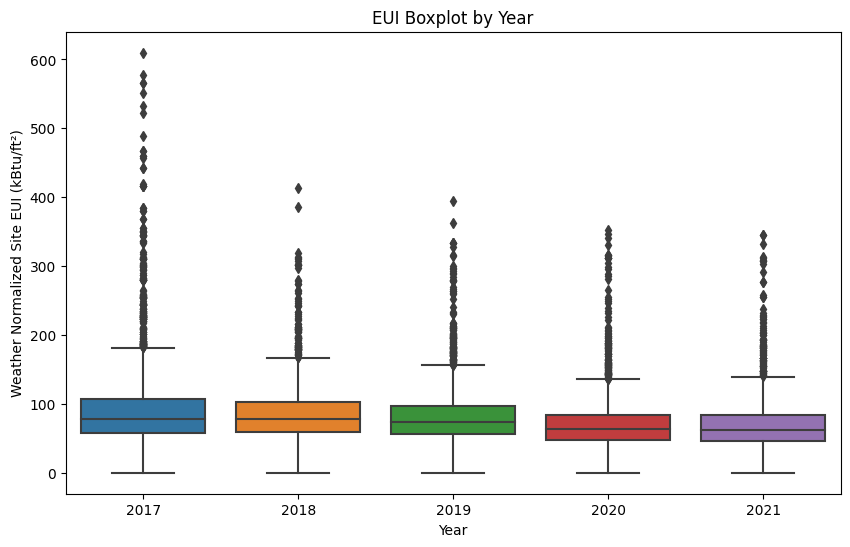

In [356]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the list of dataframes and corresponding years
df_list = [office_2017, office_2018, office_2019, office_2020, office_2021]
years = ['2017', '2018', '2019', '2020', '2021']

# Add a 'Year' column to each dataframe and ensure 'EUI' column is numeric
for i in range(len(df_list)):
    df_list[i]['Year'] = years[i]
    df_list[i]['Weather Normalized Site EUI (kBtu/ft²)'] = pd.to_numeric(df_list[i]['Weather Normalized Site EUI (kBtu/ft²)'], errors='coerce')

# Concatenate all dataframes into one
df_concat = pd.concat(df_list)

# Reshape the dataframe to long format
df_long = df_concat.melt(id_vars=['Property Id', 'Year'], value_vars=['Weather Normalized Site EUI (kBtu/ft²)'], var_name='Variable', value_name='Weather Normalized Site EUI (kBtu/ft²)')

# Remove any rows with NaN in 'EUI' column
df_long = df_long.dropna(subset=['Weather Normalized Site EUI (kBtu/ft²)'])

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='Weather Normalized Site EUI (kBtu/ft²)', data=df_long)
plt.title('EUI Boxplot by Year')
plt.show()




In [362]:
from functools import reduce

# Let's assume the dfs are named as office_2021, office_2020, ..., office_2013
all_office_dfs = [office_2021, office_2020, office_2019, office_2018, office_2017]

# To avoid overlapping column names, rename EUI column in each df and keep only necessary columns
for i in range(len(all_office_dfs)):
    year = 2021 - i  # starting from 2021
    all_office_dfs[i] = all_office_dfs[i][['Property Id', 'Weather Normalized Site EUI (kBtu/ft²)']].rename(columns={'Weather Normalized Site EUI (kBtu/ft²)': f'EUI_{year}'})

# Use reduce to merge all dfs
office_merged = reduce(lambda left,right: pd.merge(left,right,on='Property Id'), all_office_dfs)

# Create the baseline_EUI column as mean of EUI from 2013 to 2019
EUI_cols = [f'EUI_{year}' for year in range(2017, 2020)]  # columns to consider for mean
office_merged['baseline_EUI'] = office_merged[EUI_cols].mean(axis=1)

print(office_merged.head())
print(office_merged.shape)

   Property Id  EUI_2021  EUI_2020  EUI_2019  EUI_2018  baseline_EUI
0      2665508      60.6       NaN      71.5      76.5         74.00
1      2665536      77.7      85.2     150.4     154.3        152.35
2      2665629      67.0      67.1      74.1      95.8         84.95
3      4038387       NaN      91.5     109.4     120.9        115.15
4      4038392       NaN      51.3      69.3      73.0         71.15
(1557, 6)


In [377]:
# # Calculate the difference in 'Weather Normalized Site EUI (kBtu/ft²)' for each building
# Convert the EUI columns to numeric
office_merged['EUI_2021'] = pd.to_numeric(office_merged['EUI_2021'], errors='coerce')
office_merged['EUI_2020'] = pd.to_numeric(office_merged['EUI_2020'], errors='coerce')
office_merged['baseline_EUI'] = pd.to_numeric(office_merged['baseline_EUI'], errors='coerce')

# Now calculate the differences
office_merged['EUI_diff_2021_2020'] = office_merged['EUI_2021'] - office_merged['EUI_2020']
office_merged['EUI_diff_2021_baseline'] = office_merged['EUI_2021'] - office_merged['baseline_EUI']
office_merged['EUI_diff_2020_baseline'] = office_merged['EUI_2020'] - office_merged['baseline_EUI']

print(office_merged['EUI_diff_2021_2020'].mean())
print(office_merged['EUI_diff_2021_baseline'].mean())
print(office_merged['EUI_diff_2020_baseline'].mean())
print(office_merged['baseline_EUI'].mean())

office_ll84 = pd.merge(office_2021, office_merged, on='Property Id', how='left')

print(office_ll84.head())
print(office_2021.shape)
print(office_ll84.shape)

-0.40407854984894276
-12.340574374079528
-12.064525339043541
82.53078982597054
   Property Id                      Property Name  \
0      2665508       Stellar - 44-50 West 28th St   
1      2665536  Stellar - 119-21 West 23rd Street   
2      2665629       Stellar - 32-02 Skillman Ave   
3      4038387        Stellar - 233 Spring Street   
4      4038392         Stellar - 161 Sixth Avenue   

                    Parent Property Id                 Parent Property Name  \
0  Not Applicable: Standalone Property  Not Applicable: Standalone Property   
1  Not Applicable: Standalone Property  Not Applicable: Standalone Property   
2  Not Applicable: Standalone Property  Not Applicable: Standalone Property   
3  Not Applicable: Standalone Property  Not Applicable: Standalone Property   
4  Not Applicable: Standalone Property  Not Applicable: Standalone Property   

  Year Ending NYC Borough, Block and Lot (BBL)  \
0  12/31/2021                     1-00829-0068   
1  12/31/2021              

In [393]:
pluto = pd.read_csv('/Users/luchen/Documents/MSUA/Capstone/datasets/PLUTO/Primary_Land_Use_Tax_Lot_Output__PLUTO_.csv', na_values='')

# change BBL to numeric
office_ll84['NYC Borough, Block and Lot (BBL)'] = office_ll84['NYC Borough, Block and Lot (BBL)'].apply(lambda x: pd.to_numeric(x, errors='coerce'))

# merge pluto and ll84 data on BBL
office_pluto = pd.merge(office_ll84, pluto, how='inner', left_on='NYC Borough, Block and Lot (BBL)', right_on='bbl')

print(office_pluto.shape)
print(list(office_pluto.columns))

office_pluto.to_csv('/Users/luchen/Documents/MSUA/Capstone/datasets/office_pluto.csv', index=False)

/var/folders/x5/bpzm5rm93fz73p0v851qytl80000gn/T/ipykernel_82951/443369919.py:1: DtypeWarning: Columns (17,18,20,22,24,25,52,62) have mixed types. Specify dtype option on import or set low_memory=False.
  pluto = pd.read_csv('/Users/luchen/Documents/MSUA/Capstone/datasets/PLUTO/Primary_Land_Use_Tax_Lot_Output__PLUTO_.csv', na_values='')


(1268, 359)
['Property Id', 'Property Name', 'Parent Property Id', 'Parent Property Name', 'Year Ending', 'NYC Borough, Block and Lot (BBL)', 'NYC Building Identification Number (BIN)', 'Address 1', 'City', 'Postal Code', 'Primary Property Type - Self Selected', 'Primary Property Type - Portfolio Manager-Calculated', 'National Median Reference Property Type', 'List of All Property Use Types at Property', 'Largest Property Use Type', 'Largest Property Use Type - Gross Floor Area (ft²)', '2nd Largest Property Use Type', '2nd Largest Property Use - Gross Floor Area (ft²)', '3rd Largest Property Use Type', '3rd Largest Property Use Type - Gross Floor Area (ft²)', 'Year Built', 'Construction Status', 'Number of Buildings', 'Occupancy', 'Metered Areas (Energy)', 'Metered Areas (Water)', 'ENERGY STAR Score', 'National Median ENERGY STAR Score', 'Target ENERGY STAR Score', 'Reason(s) for No Score', 'ENERGY STAR Certification - Year(s) Certified (Score)', 'ENERGY STAR Certification - Eligibilit

- Annual Maximum Demand (kW)
- Office - Worker Density (Number per 1,000 sq ft)
- Office - Number of Workers on Main Shift
- Office - Weekly Operating Hours

- Building Square Footage – Total building area as reported in PM
- Building Age – Age of building based on year built from PLUTO database (new variable)
- Number of Floors – Total number of floors in building from PLUTO database
- FAR – As-built floor area ratio from PLUTO database

- Lot Coverage – building footprint divided by lot area from PLUTO database. Building footprint approximated by multiplying building width by building depth (new variable)
- Lot Location – a binary variable for whether the building is an inside lot or corner lot (based on variable from the PLUTO database)
- Detached Building - a binary variable for whether the building is detached or attached to adjacent buildings (based on variable from the PLUTO database)

- Primary Energy Source – a binary variable equal to 1 for the dominant fuel type in the building, and equal to 0 otherwise (new variable)
- % non-Primary Space Type – percentage of non-primary space type (e.g. percentage of retail in a building with a majority office space) (new variable)

For Office buildings, the following variables are added to the base model:
- Office Worker Density – Number of employees per 1,000 square feet (default value = 2.3)
- Office Weekly Operating Hours – number of hours per week that a building is occupied by at least 75% of the tenant employees (default value = 65 hours per week)

In [410]:
# Drop rows where 'Weather Normalized Site EUI (kBtu/ft²)' is empty (NaN)
# office_pluto = office_pluto.dropna(subset=['Weather Normalized Site EUI (kBtu/ft²)'])
# print(office_pluto.shape)

office_model_raw = office_pluto[[
    'Year Built',
    'Office - Worker Density (Number per 1,000 sq ft)',
    'Office - Weekly Operating Hours',
    
    
    'ENERGY STAR Score',
    'Annual Maximum Demand (kW)',
    
    '2nd Largest Property Use Type',
    '2nd Largest Property Use - Gross Floor Area (ft²)',
    'Parking - Gross Floor Area (ft²)',
    'Restaurant - Gross Floor Area (ft²)',
    
    
    # from pluto
    'bldgarea',
    'comarea',
    'resarea',
    'officearea',
    'retailarea',
    'garagearea',
    'strgearea', # storage area
    'factryarea',
    'otherarea',
    'numfloors',
    'bldgfront', 
    'bldgdepth',
    'proxcode', # PROXIMITY CODE  0 - Not available 1 - Detached 2 - Semi-attached 3 - Attached
    'bsmtcode',# basement
    'builtfar', # floor area ratio 
    
    'Weather Normalized Site EUI (kBtu/ft²)',
    'EUI_2021',
    'EUI_2020',
    'EUI_2019',
    'EUI_2018',
    'baseline_EUI',
    'EUI_diff_2021_2020',
    'EUI_diff_2021_baseline',
    'EUI_diff_2020_baseline'
]].copy()

In [411]:
# new variables
office_model_raw['Building Age'] = 2023 - office_model_raw['Year Built']
office_model_raw['building Coverage'] = office_model_raw['bldgfront'] * office_model_raw['bldgdepth']
office_model_raw['front depth ratio'] = office_model_raw['bldgdepth'] / office_model_raw['bldgfront']
office_model_raw['Non-primary gross area'] = office_model_raw['comarea'] + office_model_raw['resarea'] + office_model_raw['retailarea'] + office_model_raw['garagearea'] + office_model_raw['strgearea'] + office_model_raw['factryarea'] + office_model_raw['otherarea'] 
office_model_raw['Non-primary gross area'] = office_model_raw['Non-primary gross area'].fillna(0)
office_model_raw['% Non-primary gross area'] = office_model_raw['Non-primary gross area'] / office_model_raw['bldgarea']
office_model_raw['mix-used'] = np.where(office_model_raw['Non-primary gross area'] != 0, 1, 0)

In [412]:
office_model= office_model_raw[[
    'Building Age',
    'Office - Worker Density (Number per 1,000 sq ft)',
    'Office - Weekly Operating Hours',
    
    
    'ENERGY STAR Score',
    'Annual Maximum Demand (kW)',
    
    'mix-used',
    '% Non-primary gross area',
    
    # from pluto
    'bldgarea',
    # 'comarea',
    # 'resarea',
    # 'officearea',
    # 'retailarea',
    # 'garagearea',
    # 'strgearea', # storage area
    # 'factryarea',
    # 'otherarea',
    'numfloors',
    # 'bldgfront', 
    # 'bldgdepth',
    'proxcode', # PROXIMITY CODE  0 - Not available 1 - Detached 2 - Semi-attached 3 - Attached
    'bsmtcode',# basement
    'builtfar', # floor area ratio 
    'building Coverage',
    'front depth ratio',
    
    'Weather Normalized Site EUI (kBtu/ft²)',
    'EUI_2021',
    'EUI_2020',
    'EUI_2019',
    'EUI_2018',
    'baseline_EUI',
    'EUI_diff_2021_2020',
    'EUI_diff_2021_baseline',
    'EUI_diff_2020_baseline'
]].copy()